In [ ]:
#import the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('cyberbullying_tweets.csv')

In [ ]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
data['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [ ]:
data.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

#Data Preprocessing


In [ ]:
# Encode the labels into numbers 

def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data['encoding']= label_encoder.fit_transform(data[c1])
    data['encoding'].unique()
LABEL_ENCODING("cyberbullying_type")
data

,tweet_text,cyberbullying_type,encoding
0,"In other words #katandandre, your food was cra...",not_cyberbullying,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,3
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,3
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,3
...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1


In [ ]:
# function for cleaning tweets
def clean_tweet(df,field):
    df['text'] = df[field].str.replace(r"http\S+"," ")
    df['text'] = df[field].str.replace(r"http"," ")
    df['text'] = df[field].str.replace(r"@","at")
    df['text'] = df[field].str.replace("#[A-Za-z0-9_]+", ' ')
    df['text'] = df[field].str.replace(r"[^A-Za-z(),!?@\'\"_\n]"," ")
    df['text'] = df[field].str.lower()
    return df

In [ ]:
clean_tweet(data,"tweet_text")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


,tweet_text,cyberbullying_type,encoding,text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,3,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,3,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,3,@xochitlsuckkks a classy whore? or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,3,"@jason_gio meh. :p thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,3,@rudhoeenglish this is an isis account pretend...
...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,1,"black ppl aren't expected to do anything, depe..."
47688,Turner did not withhold his disappointment. Tu...,ethnicity,1,turner did not withhold his disappointment. tu...
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,1,i swear to god. this dumb nigger bitch. i have...
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,1,yea fuck you rt @therealexel: if youre a nigge...


In [ ]:
!pip install emoji

     |████████████████████████████████| 175 kB 12.0 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=acad385771160619377c565ff71ec576f49fb1f21fc06bb6c5cf6034d33c6a41
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
# Applying Lemmmatizer to remove tenses from texts
# CORPUS 1
import emoji
from wordcloud import WordCloud, STOPWORDS
import re,string, nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import warnings
import nltk
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 
                  'im', 'll', 'y', 've', 'u', 'ur', 'don', 
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat', 
                  'de', 're', 'amp', 'will'])
corpus = []
def preprocess_tweet(tweet):
    tweet = re.sub(r"won\'t", "will not", tweet)
    tweet = re.sub(r"can\'t", "can not", tweet)
    tweet = re.sub(r"n\'t", " not", tweet)
    tweet = re.sub(r"\'re", " are", tweet)
    tweet = re.sub(r"\'s", " is", tweet)
    tweet = re.sub(r"\'d", " would",tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'t", " not", tweet)
    tweet = re.sub(r"\'ve", " have", tweet)
    tweet = re.sub(r"\'m", " am", tweet)
    tweet = re.sub('[^a-zA-Z]',' ',tweet)
    tweet = re.sub(emoji.get_emoji_regexp(),"",tweet)
    tweet = re.sub(r'[^\x00-\x7f]','',tweet)
    tweet = " ".join([stemmer.stem(word) for word in tweet.split()])
    tweet = [lemmatizer.lemmatize(word) for word in tweet.split() if not word in set(STOPWORDS)]
    tweet = ' '.join(tweet)
    return tweet

data["text_clean"] = data["text"].apply(preprocess_tweet)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'


In [ ]:
data.drop_duplicates("text_clean", inplace=True)

# Data Analysis

In [ ]:
import plotly.express as px

In [ ]:
for cyber_type in data.cyberbullying_type.unique():
    
    top50_word = data.text_clean[data.cyberbullying_type==cyber_type].str.split(expand=True).stack().value_counts()[:20]
    
    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    
    fig.update_layout(title=f"Top 20 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

In [ ]:
# Creating a bag of words (not useful as we decided to use TF-IDF method)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500,ngram_range=(1,3))
X = cv.fit_transform(data['text_clean']).toarray()
y = data['encoding']

In [ ]:
# Using TF-IDF method

import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize,min_df=0.00002,max_df=0.70)
X = tfidf_v.fit_transform(data['text_clean'].astype('U'))
y = data['encoding']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Splitting test and training set

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Machine Learning Models


In [ ]:
# Multinomial method

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=1)
classifier.fit(X1_train, y1_train)
pred1 = classifier.predict(X1_test)
pred1 = classifier.predict(X1_test)
accuracy_score(y1_test, pred1)

0.7705708337898542

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {  
'alpha': (100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001)  
}  
grid_search= GridSearchCV(classifier, parameters)
grid_search.fit(X1_train,y1_train)

GridSearchCV(estimator=MultinomialNB(alpha=1),
             param_grid={'alpha': (100, 10, 1, 0.1, 0.01, 0.001, 0.0001,
                                   1e-05)})

In [ ]:
print('The best parameters values are ', grid_search.best_params_,  grid_search.best_score_)

The best parameters values are  {'alpha': 1} 0.7697849609642515


In [ ]:
# Decision Tree Classifier
# Result: with TF-IDF --> 80.07%

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=25)
clf.fit(X1_train,y1_train)
pred2 = clf.predict(X1_test)
accuracy_score(y1_test, pred2)

In [ ]:
parameters = {  
'max_depth': ( 18, 20, 22, 23, 24, 25)  
}  
grid_search= GridSearchCV(clf, parameters)
grid_search.fit(X1_train,y1_train)
print('The best parameters values are ', grid_search.best_params_,  grid_search.best_score_)

The best parameters values are  {'max_depth': 25}


In [ ]:
# SVM model

from sklearn import svm

#Create a svm Classifier
sv = svm.SVC(kernel='linear') # Linear Kernel
sv.fit(X1_train, y1_train)
pred4 = sv.predict(X1_test)
accuracy_score(y1_test, pred4)

0.8480333077681604

In [ ]:
f1_score(y1_test,pred4, average="macro")

0.8387285926187027

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


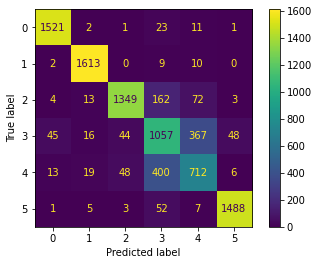

In [ ]:
plot_confusion_matrix(sv, X1_test, y1_test)  
plt.show()

In [ ]:
params = {
      'C' : [1, 1.5, 2],
     'gamma': ['auto', 'scale'],  
     'tol': [1e-3, 1e-2, 1e-4, 1e-1],
     'max_iter' : [1,-1],
     'random_state' : [0, 3, 10] 
 }

sv = svm.SVC(kernel='linear')
grid_cv = GridSearchCV(sv, param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X1_train, y1_train)  
print('The best parameters values are ', grid_cv.best_params_,  grid_search.best_score_)

In [ ]:
from sklearn.svm import LinearSVC
LSVCClf = LinearSVC(dual = False, random_state = 0, penalty = 'l1',tol = 1e-5)
LSVCClf.fit(X1_train, y1_train)
pred5 = LSVCClf.predict(X1_test)
accuracy_score(y1_test, pred5)

0.8319530349093196

# Bagging Methods


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X1_train,y1_train)
predrf = rf.predict(X1_test)
accuracy_score(y1_test, predrf)

0.8496767831708119

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(min_samples_split=8, n_estimators=230)
rf.fit(X1_train,y1_train)
predrf = rf.predict(X1_test)
accuracy_score(y1_test, predrf)

0.8520872137613674

In [ ]:
f1_score(y1_test,predrf, average=None)

array([0.97877814, 0.98407838, 0.88529887, 0.65553236, 0.59185442,
       0.95836003])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


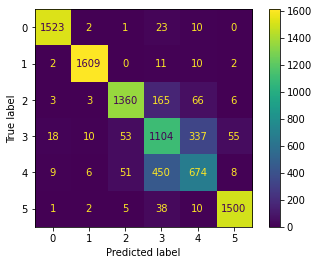

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X1_test, y1_test)  
plt.show()

In [ ]:
imp_feat = []
for f in np.argsort(rf.feature_importances_)[-15:]:
  imp_feat.append(tfidf_v.get_feature_names()[f])
plt.figure(figsize=(10,8)) 
plt.title("feature importance")
plt.bar(imp_feat[::-1],np.sort(rf.feature_importances_)[-15:][::-1])

In [ ]:
parameters = {  
'max_depth': ( 18, 20, 22, 23, 24, 25)  
}  
grid_search= GridSearchCV(rf, parameters)
grid_search.fit(X1_train,y1_train)
print('The best parameters values are ', grid_search.best_params_, grid_search.best_score_)

The best parameters values are  {'max_depth': 23}


In [ ]:
#Extratree

from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X1_train, y1_train)
Z = clf.predict(X1_test)
accuracy=clf.score(X1_test,y1_test)
print(accuracy)

In [ ]:
from sklearn.model_selection import GridSearchCV
pgrid = {"n_estimators": [10,30,50,70]}
grid_search = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X1_train, y1_train)
best_score=grid_search.best_estimator_.score(X1_test, y1_test)
best_max_samples=grid_search.best_estimator_.max_samples
best_max_features=grid_search.best_estimator_.max_features
print("best_score ", best_score)
print("best_max_samples ", best_max_samples)
print("best_max_features ", best_max_features)

# Boosting methods


In [ ]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(clf, n_estimators=500, learning_rate=0.03)
ada.fit(X1_train,y1_train)
pred3 = ada.predict(X1_test)
accuracy_score(y1_test, pred3)

0.8283116029363428

In [ ]:
f1_score(y1_test, pred3, average = 'macro')

0.8183560820001788

In [ ]:
# Grid search
from sklearn.ensemble import AdaBoostClassifier
params = {
     'n_estimators': [100,200,250,300,500],  
     'learning_rate': [0.01, 0.05, 0.1, 1.0], 
 }

ada = AdaBoostClassifier(clf )
grid_cv = GridSearchCV(ada, param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X1_train, y1_train) 
print('The best parameters values are ', grid_cv.best_params_,  grid_search.best_score_)

In [ ]:
#XGBoost
import xgboost as xgb
ada = xgb.XGBClassifier(learning_rate=0.01)
ada.fit(X1_train,y1_train)
pred3 = ada.predict(X1_test)
accuracy_score(y1_test, pred3)
import xgboost as xgb


In [ ]:
accuracy_score(y1_test, pred3)

0.773529089514627

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
params = {
     'n_estimators': np.arange(1,101),
     'learning_rate': [0.01, 0.05, 0.1, 1],
 }
grid_cv = GridSearchCV(GradientBoostingClassifier(), param_grid= params, cv=5, n_jobs=-1)
grid_cv.fit(X1_train,y1_train)
print("Best params:", grid_cv.best_params_)
gbc_best = grid_cv.best_estimator_

accuracy_gbc_best=accuracy_score(y_pred=gbc_best.predict(X1_test), y_true=y1_test)
print('Accuracy score for GBC tuned ', accuracy_gbc_best)


In [ ]:
#CatBoost

from catboost import CatBoostClassifier, Pool
#learning rate 0.1 0.789

#indicating which features are not categorical
train_pool = Pool(X1_train, y1_train)

#actual model
cat = CatBoostClassifier(iterations=80, learning_rate=0.1, depth=10, one_hot_max_size=1500)
cat.fit(train_pool)

#make prediction for evaluation
y_pred_cat = cat.predict(X1_test)
accuracy_score(y1_test,y_pred_cat)